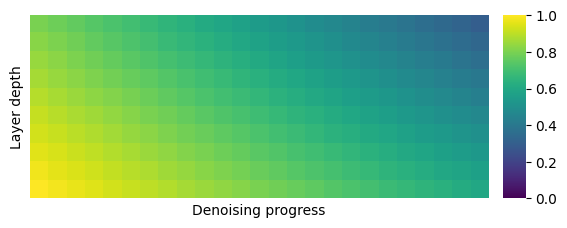

In [48]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt

# x=t
# y=layer


def bilinear_blend(
    diffusion_progress,
    layer_depth,
    early_t_shallow_layer=1.0,
    early_t_deep_layer=0.8,
    late_t_shallow_layer=0.6,
    late_t_deep_layer=0.3,
):
    return (
        early_t_shallow_layer * (1 - diffusion_progress) * (1 - layer_depth)
        + late_t_shallow_layer * diffusion_progress * (1 - layer_depth)
        + early_t_deep_layer * (1 - diffusion_progress) * layer_depth
        + late_t_deep_layer * diffusion_progress * layer_depth
    )


# Create a grid of x and y values
x = np.linspace(0, 1, 25)
y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)

# Apply the blend function to each point on the grid
Z = bilinear_blend(X, Y)

fig, ax = plt.subplots()
im = ax.imshow(Z, origin="lower", vmin=0, vmax=1)
ax.set_xlabel("Denoising progress")
ax.set_ylabel("Layer depth")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
plt.colorbar(im, cax=cax)

# Remove ticks and spines
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

for spine in cax.spines.values():
    spine.set_visible(False)

plt.savefig('outs/bilinear_blend.pdf', bbox_inches='tight', dpi=300)

# # Get dimensions for arrow placement
# x0, x1 = ax.get_xlim()
# y0, y1 = ax.get_ylim()

# # Add axis direction arrows
# arrowprops = dict(arrowstyle="->", lw=1.5, color="black", clip_on=False)

# # X arrow (right, just below the image)
# ax.annotate('', xy=(x1 + 0.5, y1 + 0.5), xytext=(x1 - 1, y1 + 0.5),
#             arrowprops=arrowprops)

# # Y arrow (down, just to the left of the image)
# ax.annotate('', xy=(x0 - 0.5, y0 - 0.5), xytext=(x0 - 0.5, y0 + 1),
#             arrowprops=arrowprops)

# # Colorbar matching heatmap height
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# plt.colorbar(im, cax=cax)

In [23]:
module_paths = [
    "mid_block.attentions.0.transformer_blocks.0.attn1",
    "up_blocks.1.attentions.0.transformer_blocks.0.attn1",
    "up_blocks.1.attentions.1.transformer_blocks.0.attn1",
    "up_blocks.1.attentions.2.transformer_blocks.0.attn1",
    "up_blocks.2.attentions.0.transformer_blocks.0.attn1",
    "up_blocks.2.attentions.1.transformer_blocks.0.attn1",
    "up_blocks.2.attentions.2.transformer_blocks.0.attn1",
    "up_blocks.3.attentions.0.transformer_blocks.0.attn1",
    "up_blocks.3.attentions.1.transformer_blocks.0.attn1",
    "up_blocks.3.attentions.2.transformer_blocks.0.attn1",
]

len(module_paths)

10